<a href="https://colab.research.google.com/github/shawdaena/Artificial_intelligence_Lab/blob/main/AI_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#file upload section
from google.colab import files
uploaded = files.upload()

Saving mnist_custom.npz to mnist_custom.npz


In [ ]:
# start code

In [2]:
#import section
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

In [5]:
#print element
print(data.files)

['trainX', 'trainY', 'testX', 'testY']


In [6]:
#load section
data    = np.load("/content/mnist_custom.npz")
X_train = data['trainX']
X_test = data['testX']
y_train = data['trainY']
y_test = data['testY']
print( X_train.shape)
print(X_test.shape)

(2574, 28, 28)
(644, 28, 28)


In [7]:
# normalize section
X_train = X_train.astype("float32")/255.0
X_test  = X_test.astype("float32")/255.0

In [8]:
# Neural Network Section
inputs = Input((28,28))
x = Flatten()(inputs)
x1 = Dense(256, activation="relu")(x)
x2 = Dense(128,  activation="relu")(x1)
x3 = Dense(64,  activation="relu")(x2)
x4 = Dense(32,  activation="relu")(x3)
outputs = Dense(10, activation="softmax")(x4)
model = Model(inputs, outputs)

In [9]:
#Compile Section
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
#model fitting
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2739 - loss: 2.0667 - val_accuracy: 0.5606 - val_loss: 1.3191
Epoch 2/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6369 - loss: 1.1578 - val_accuracy: 0.6289 - val_loss: 1.0917
Epoch 3/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6953 - loss: 0.9363 - val_accuracy: 0.6708 - val_loss: 0.9896
Epoch 4/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7707 - loss: 0.7007 - val_accuracy: 0.7158 - val_loss: 0.9291
Epoch 5/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8185 - loss: 0.5580 - val_accuracy: 0.7174 - val_loss: 0.9256
Epoch 6/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8483 - loss: 0.4689 - val_accuracy: 0.7298 - val_loss: 0.9470
Epoch 7/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8739 - loss: 0.4082 - val_accuracy: 0.7283 - val_loss: 1.0178
Epoch 8/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8858 - loss: 0.3413 - val_accuracy: 0.7252 - v

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test Accuracy: 0.7934782608695652


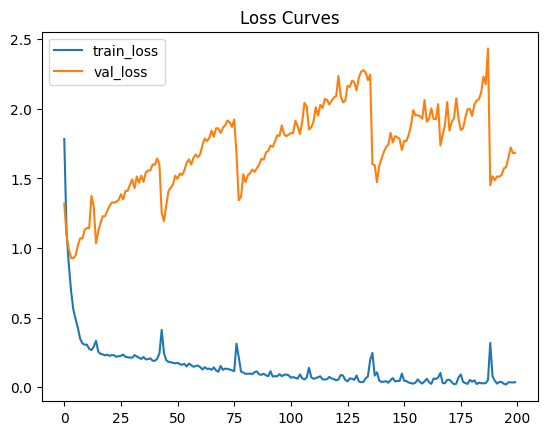

In [11]:
#predict the accuracy and validation loss
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Test Accuracy:", float(acc))

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

In [14]:
#print model shape
model.input_shape

(None, 28, 28)

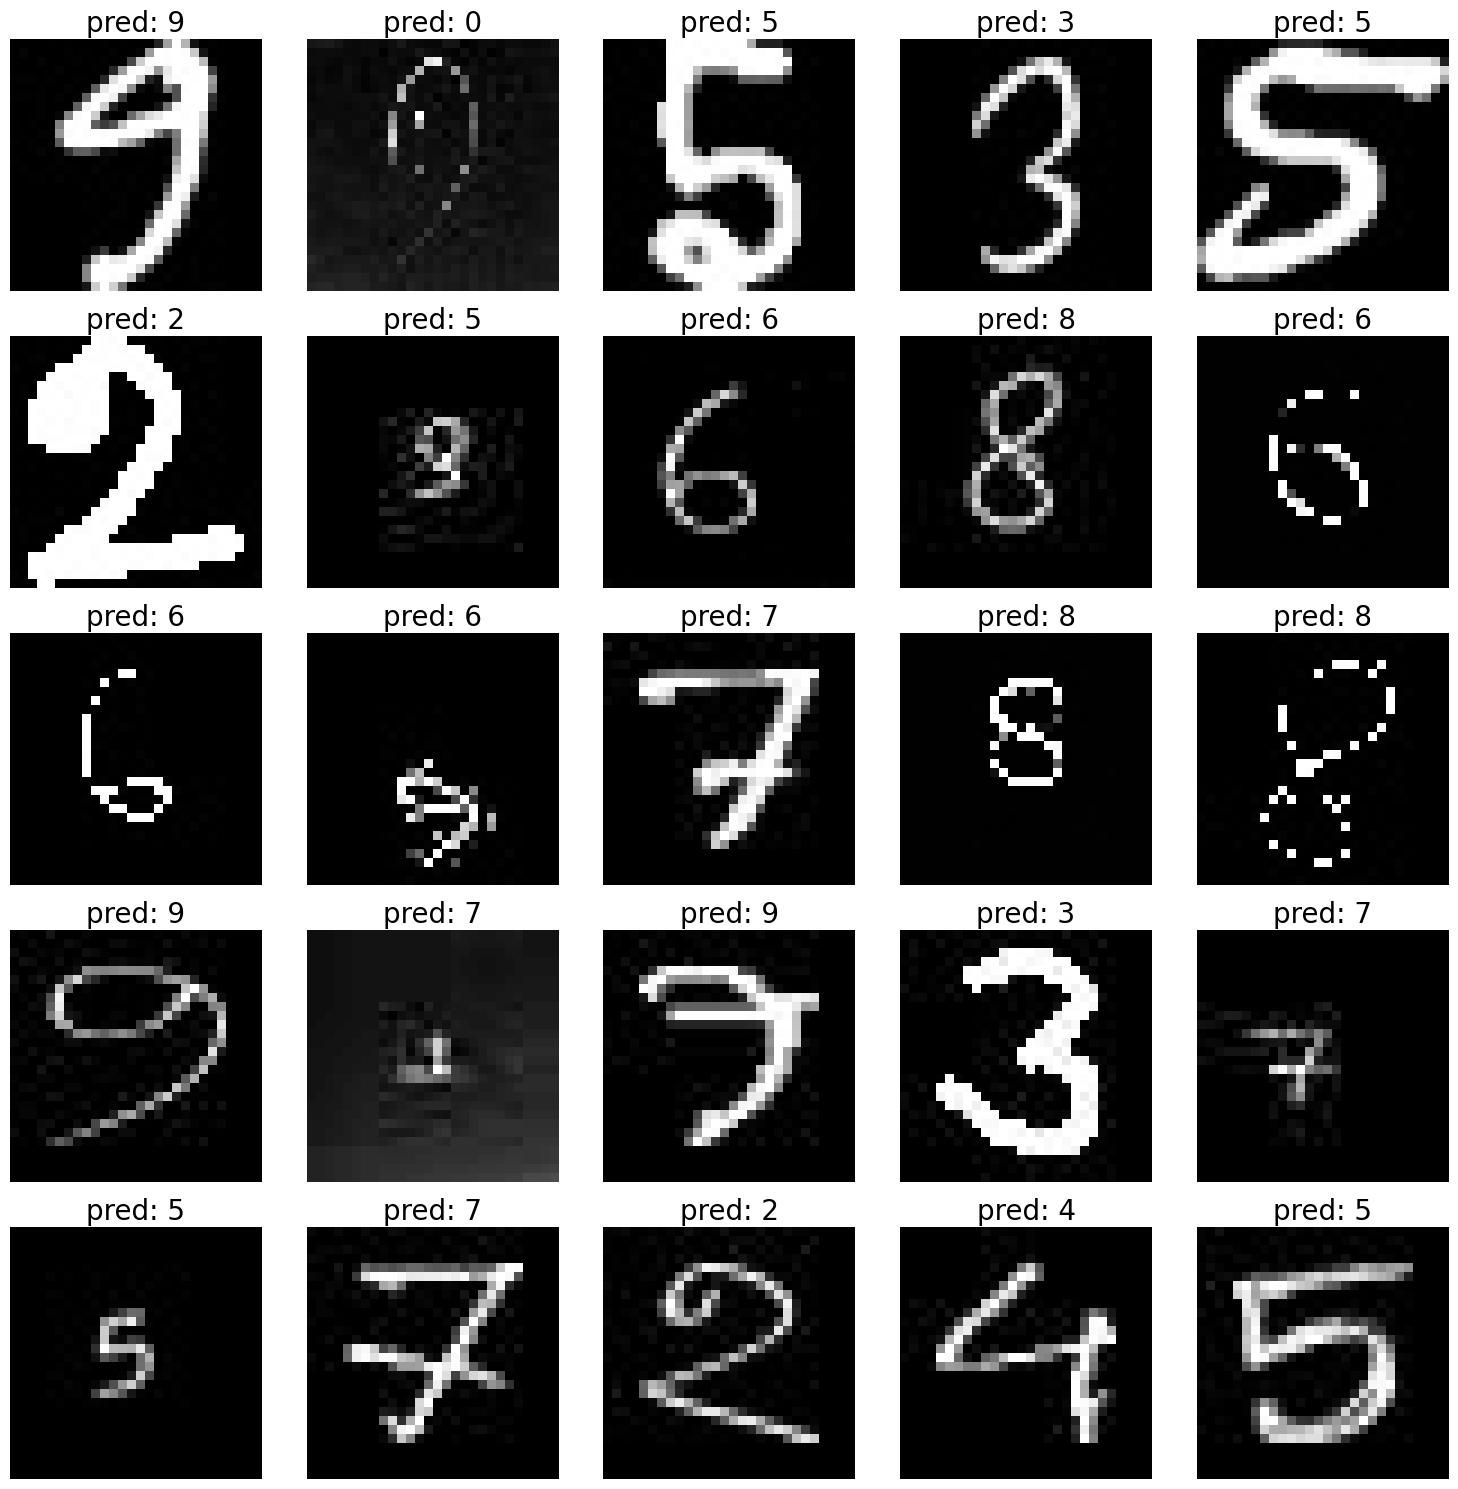

In [15]:
plt.figure(figsize=(15,15))
n_show = min(25, len(X_test))
rows, cols = 5, 5

for i in range(n_show):
    plt.subplot(rows, cols, i+1)

    sample = X_test[i].reshape(1, 28, 28)

    pred = model.predict(sample, verbose=0).argmax(axis=1)[0]
    plt.title(f"pred: {pred}", fontsize=20)

    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()